In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('adult.csv')

In [3]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.education.value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [6]:
df.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [7]:
df = pd.concat([df.drop('occupation', axis=1), pd.get_dummies(df.occupation).add_prefix('occupation_')], axis=1)
df = pd.concat([df.drop('workclass', axis=1), pd.get_dummies(df.workclass).add_prefix('workclass_')], axis=1)
df = df.drop('education', axis=1)
df = pd.concat([df.drop('marital-status', axis=1), pd.get_dummies(df['marital-status']).add_prefix('marital-status_')], axis=1)
df = pd.concat([df.drop('relationship', axis=1), pd.get_dummies(df.relationship).add_prefix('relationship_')], axis=1)
df = pd.concat([df.drop('race', axis=1), pd.get_dummies(df.race).add_prefix('race_')], axis=1)
df = pd.concat([df.drop('native-country', axis=1), pd.get_dummies(df['native-country']).add_prefix('native-country_')], axis=1)

In [8]:
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,Male,0,0,40,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,Male,0,0,50,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,336951,12,Male,0,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,160323,10,Male,7688,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
4,18,103497,10,Female,0,0,30,<=50K,True,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,Female,0,0,38,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
48838,40,154374,9,Male,0,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,58,151910,9,Female,0,0,40,<=50K,False,True,...,False,False,False,False,False,False,False,True,False,False
48840,22,201490,9,Male,0,0,20,<=50K,False,True,...,False,False,False,False,False,False,False,True,False,False


In [9]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [10]:
df.columns.values

array(['age', 'fnlwgt', 'educational-num', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'mari

<Axes: >

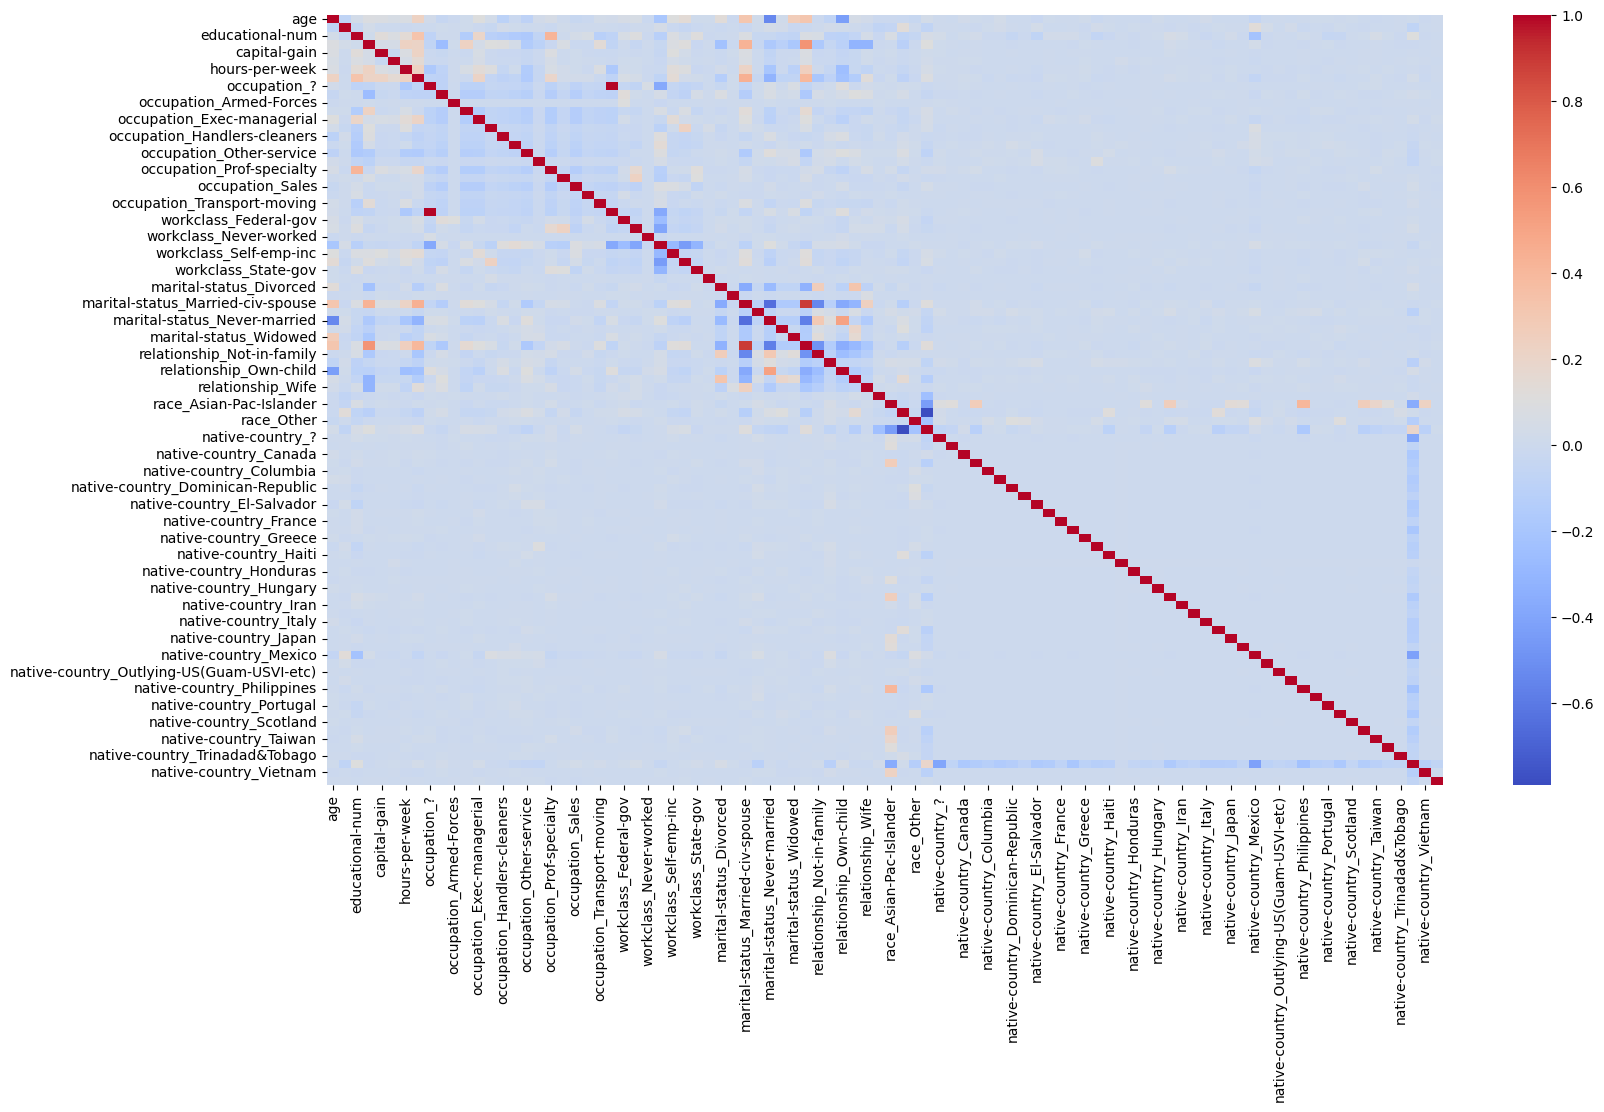

In [11]:
plt.figure(figsize=(18, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')

In [12]:
df.corr()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
age,1.000000,-0.076628,0.030940,0.088120,0.077229,0.056944,0.071558,0.230369,0.025683,-0.038116,...,0.007016,0.005474,0.012281,-0.001942,-0.011872,-0.001766,0.001056,0.011888,-0.012337,0.002905
fnlwgt,-0.076628,1.000000,-0.038761,0.027739,-0.003706,-0.004366,-0.013519,-0.006339,-0.005405,0.007480,...,-0.013577,0.008708,-0.006523,-0.010342,-0.001733,-0.001512,0.004153,-0.070645,-0.007479,0.004699
educational-num,0.030940,-0.038761,1.000000,0.009328,0.125146,0.080972,0.143689,0.332613,-0.080053,0.004142,...,-0.047816,-0.041776,0.000907,0.012984,0.045420,0.007283,-0.010201,0.104210,-0.007544,-0.005798
gender,0.088120,0.027739,0.009328,1.000000,0.047094,0.045480,0.228560,0.214628,-0.063844,-0.260349,...,0.009649,-0.009940,-0.002178,-0.005272,0.003041,-0.007117,-0.009342,-0.011167,-0.001545,0.005262
capital-gain,0.077229,-0.003706,0.125146,0.047094,1.000000,-0.031441,0.082157,0.223013,-0.019157,-0.029105,...,-0.004355,-0.006137,-0.002317,0.003906,0.004260,-0.002781,-0.003039,0.004191,-0.002673,-0.000474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native-country_Thailand,-0.001766,-0.001512,0.007283,-0.007117,-0.002781,-0.002338,0.008558,-0.004219,-0.002575,-0.001157,...,-0.000919,-0.001525,-0.000514,-0.001204,-0.000905,1.000000,-0.000583,-0.073329,-0.001041,-0.000538
native-country_Trinadad&Tobago,0.001056,0.004153,-0.010201,-0.009342,-0.003039,0.004028,-0.002911,-0.009107,-0.002068,0.007917,...,-0.000872,-0.001446,-0.000488,-0.001143,-0.000859,-0.000583,1.000000,-0.069564,-0.000988,-0.000510
native-country_United-States,0.011888,-0.070645,0.104210,-0.011167,0.004191,0.009449,0.004390,0.032551,0.005546,0.022126,...,-0.109626,-0.181890,-0.061346,-0.143695,-0.107976,-0.073329,-0.069564,1.000000,-0.124226,-0.064202
native-country_Vietnam,-0.012337,-0.007479,-0.007544,-0.001545,-0.002673,-0.000118,-0.008289,-0.015542,-0.004082,0.010905,...,-0.001557,-0.002583,-0.000871,-0.002040,-0.001533,-0.001041,-0.000988,-0.124226,1.000000,-0.000912


In [13]:
df['income']

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int64

In [14]:
correlations = df.corr()['income'].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.8 * len(df.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
df_dropped = df.drop(cols_to_drop, axis=1)

In [15]:
df_dropped

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,workclass_Self-emp-inc,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,7,1,0,0,40,0,False,False,False,False,False,False,True,False,False,True,False,False
1,38,9,1,0,0,50,0,False,False,False,False,False,True,False,True,False,False,False,False
2,28,12,1,0,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
3,44,10,1,7688,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
4,18,10,0,0,0,30,0,False,False,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,False,False,False,False,False,True,False,False,False,False,False,True
48838,40,9,1,0,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
48839,58,9,0,0,0,40,0,False,False,False,False,False,False,False,False,False,False,True,False
48840,22,9,1,0,0,20,0,False,False,False,False,False,False,True,False,False,True,False,False


<Axes: >

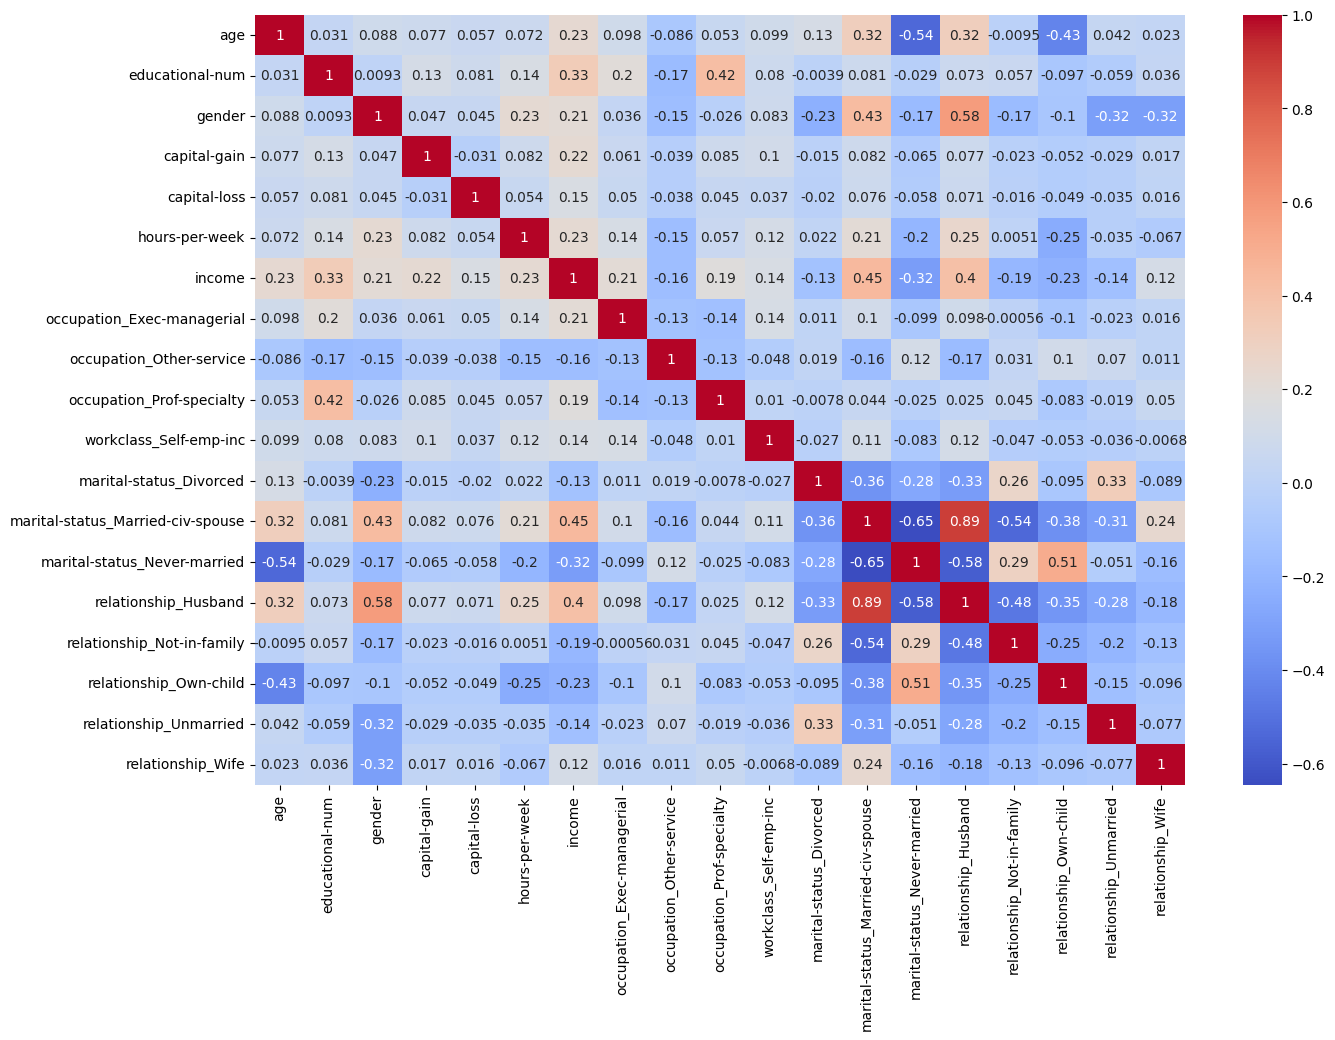

In [16]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_dropped.corr(), annot=True, cmap='coolwarm')

In [17]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split

df = df.drop('fnlwgt', axis=1)

train_df, test_df = train_test_split(df, test_size=0.2)

In [18]:
train_x = train_df.drop('income', axis=1)
train_y = train_df['income']

test_x = test_df.drop('income', axis=1)
test_y = test_df['income']

In [19]:
forest = RandomForestClassifier()

forest.fit(train_x, train_y)



RandomForestClassifier()

In [20]:
forest.score(test_x, test_y)

0.8509571092230526

In [21]:
forest.feature_importances_

array([2.31779889e-01, 1.26219448e-01, 1.33489007e-02, 1.07709391e-01,
       3.68619929e-02, 1.14966374e-01, 1.86696437e-03, 4.91869255e-03,
       6.08664443e-05, 6.25351264e-03, 2.15621873e-02, 5.15062202e-03,
       3.41879934e-03, 4.05266970e-03, 8.21881340e-03, 1.57110475e-04,
       1.84668837e-02, 2.70379363e-03, 6.26681693e-03, 4.48588098e-03,
       4.21369881e-03, 1.86475022e-03, 5.14940097e-03, 5.42487371e-03,
       2.27194275e-06, 9.54397627e-03, 6.91992604e-03, 8.03175800e-03,
       4.66532427e-03, 1.72579402e-04, 6.42013787e-03, 2.51284957e-04,
       7.09643388e-02, 9.96288258e-04, 2.55802008e-02, 1.80899996e-03,
       1.91077257e-03, 4.30207416e-02, 1.36270682e-02, 1.69150096e-03,
       9.15750956e-03, 5.63222299e-03, 1.01275981e-02, 1.37546503e-03,
       3.12447615e-03, 4.91949062e-03, 9.11607255e-04, 6.23020927e-03,
       2.77718021e-03, 3.61079592e-04, 1.25149931e-03, 6.88072287e-04,
       2.90287854e-04, 8.49338192e-04, 2.77889109e-04, 1.43868013e-04,
      

In [22]:
forest.feature_names_in_

array(['age', 'educational-num', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'occupation_?', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'workclass_?',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'marital-status_Never-mar

In [23]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importnaces = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}

In [24]:
importnaces

{'age': 0.2317798892287164,
 'educational-num': 0.12621944835150783,
 'hours-per-week': 0.11496637449610984,
 'capital-gain': 0.10770939081570664,
 'marital-status_Married-civ-spouse': 0.07096433880580452,
 'relationship_Husband': 0.04302074156911912,
 'capital-loss': 0.03686199288079675,
 'marital-status_Never-married': 0.025580200760119878,
 'occupation_Exec-managerial': 0.021562187277176053,
 'occupation_Prof-specialty': 0.018466883730474296,
 'relationship_Not-in-family': 0.013627068219273914,
 'gender': 0.01334890065121981,
 'relationship_Wife': 0.010127598137540836,
 'workclass_Private': 0.009543976273698122,
 'relationship_Own-child': 0.00915750955949234,
 'occupation_Other-service': 0.00821881340201772,
 'workclass_Self-emp-not-inc': 0.008031758002069742,
 'workclass_Self-emp-inc': 0.006919926043401236,
 'marital-status_Divorced': 0.006420137869430301,
 'native-country_United-States': 0.006303108526427253,
 'occupation_Sales': 0.0062668169286563625,
 'occupation_Craft-repair': 

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 250],
    'max_depth': [5, 10, 30, None],
    'min_samples_split':[2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                           param_grid=param_grid, verbose=10)


In [30]:
grid_search.fit(train_x, train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.842 total time=   0.4s
[CV 2/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.836 total time=   0.4s
[CV 3/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.839 total time=   0.4s
[CV 4/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.839 total time=   0.4s
[CV 5/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

In [31]:
grid_search.best_estimator_ 

RandomForestClassifier(max_depth=30, min_samples_split=4)

In [33]:
forest = grid_search.best_estimator_

In [ ]:
forest.score(test_x, test_y)

In [34]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}

In [35]:
importances

{'age': 0.1520119535844648,
 'educational-num': 0.13803061282035584,
 'capital-gain': 0.1351246692776764,
 'hours-per-week': 0.08857742263906641,
 'marital-status_Married-civ-spouse': 0.08707701138534844,
 'relationship_Husband': 0.05866028932890018,
 'capital-loss': 0.04420854157385422,
 'marital-status_Never-married': 0.03567663463322231,
 'occupation_Exec-managerial': 0.02428169085143466,
 'occupation_Prof-specialty': 0.02094882900184274,
 'gender': 0.016800921313434608,
 'relationship_Not-in-family': 0.012933081919891072,
 'relationship_Wife': 0.011603342400050695,
 'occupation_Other-service': 0.01058602923454294,
 'marital-status_Divorced': 0.010047992114824308,
 'relationship_Own-child': 0.009525555388234118,
 'workclass_Private': 0.008468302654391635,
 'workclass_Self-emp-not-inc': 0.008304011878619962,
 'workclass_Self-emp-inc': 0.007187926843175038,
 'relationship_Unmarried': 0.006822910916021931,
 'race_White': 0.0061735269413011815,
 'native-country_United-States': 0.0060867